In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
df = pd.read_csv("car_fuel_data.csv")
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [61]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [63]:

df['speed'].dtype

dtype('int64')

In [65]:
df.describe()

,speed,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,41.927835,11.358247,0.077320,0.123711,0.082474
std,13.598524,6.991542,0.267443,0.329677,0.275441
min,14.000000,-5.000000,0.000000,0.000000,0.000000
25%,32.750000,7.000000,0.000000,0.000000,0.000000
50%,40.500000,10.000000,0.000000,0.000000,0.000000
75%,50.000000,16.000000,0.000000,0.000000,0.000000
max,90.000000,31.000000,1.000000,1.000000,1.000000


In [66]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [80]:
# df['consume'] = df['consume'].str.replace(',', '.').astype(float)
# df['distance'] = df['distance'].str.replace(',', '.').astype(float)
df['temp_inside'] = df['temp_inside'].str.replace(',', '.').astype(float)




In [76]:
df['temp_inside'].dropna(inplace=True)

In [10]:
df["gas_type"].unique()

array(['E10', 'SP98'], dtype=object)

In [21]:
df["gas_type"].value_counts()

gas_type
SP98    228
E10     160
Name: count, dtype: int64

In [69]:

df.groupby("gas_type")["consume"].sum()


gas_type
E10      789.0
SP98    1117.0
Name: consume, dtype: float64

In [71]:
df.groupby("gas_type")["consume"].mean()


gas_type
E10     4.931250
SP98    4.899123
Name: consume, dtype: float64

<Axes: >

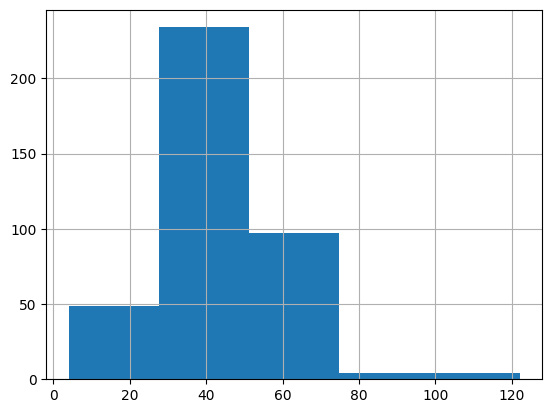

In [47]:
#histogram for fuel consumption
df['consume'].hist(bins=5)

In [36]:
df['distance'] = df['distance'].str.replace(',', '').astype(float)


<Axes: >

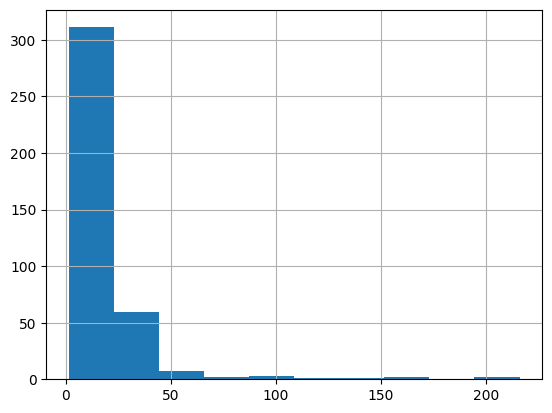

In [72]:
df['distance'].hist()

<Axes: >

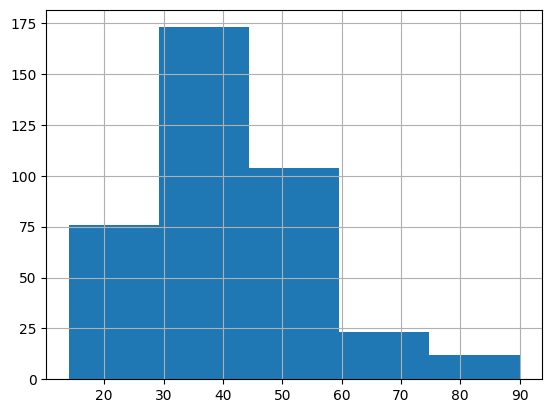

In [73]:
df['speed'].hist(bins=5)

In [39]:
df.groupby("gas_type")["consume"].sum()


gas_type
E10     7035.0
SP98    9901.0
Name: consume, dtype: float64

In [97]:
df['temp_inside']=df['temp_inside'].dropna(inplace=True)
df.isnull().sum()


distance           0
consume            0
speed              0
temp_inside      388
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

<h1>Model building</h1>

In [107]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [108]:
#split dataset in features and target variable
feature_cols = ['speed', 'rain', 'sun', 'distance','AC','temp_outside']
X = df[feature_cols] # Features
y = df['consume'] # Target variable

In [120]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=16)

In [121]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn import utils
from sklearn import preprocessing

# instantiate the model (using the default parameters)
linreg = LinearRegression()

# fit the model with data
linreg.fit(X_train, y_train)


#make prediction
y_pred = linreg.predict(X_test) 
y_pred

array([4.29464866, 4.65762434, 3.73022481, 4.63861544, 3.1419141 ,
       4.66119552, 4.08211303, 5.02391749, 5.27265966, 4.52226092,
       4.77315456, 4.24189989, 5.02533535, 5.06912705, 5.00166538,
       5.7493544 , 5.84746187, 4.27456799, 4.71540224, 5.45950462,
       4.64463499, 4.48521592, 5.19680011, 4.60603193, 4.00785747,
       5.47987754, 4.034858  , 4.21455893, 4.6022758 , 5.06906395,
       5.13074358, 5.14494726, 4.62494859, 4.49314202, 4.68345446,
       4.85985667, 5.55383469, 4.1606883 , 4.29208102, 5.14043242,
       4.60626847, 5.16060163, 4.63101827, 5.27233854, 5.59539452,
       5.97853251, 4.97102907, 5.09466519, 5.15899833, 5.33154292,
       4.37931707, 5.52142956, 4.69386362, 4.76090557, 5.77363145,
       4.99732306, 4.90576184, 4.93580894, 4.6082007 , 4.98128563,
       5.07310282, 5.39399209, 4.63566422, 4.4683799 , 4.20923179,
       5.09746937, 4.73955406, 5.26069566, 4.59820538, 5.20894443,
       5.4432515 , 5.27912267, 5.00347109, 5.50254349, 5.00283

<h1>Model Evaluation</h1>

In [122]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(y_test, y_pred)

errors

0.9085189026922813